![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sentiment_classifier_demo_natural_disasters.ipynb)


# Training a Sentiment Analysis Classifier with NLU 
## 2 Class Natural Disasters Sentiment Classifer Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data:


<br>

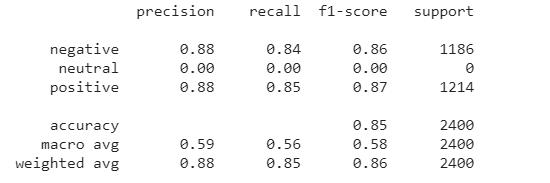

You can achieve these results or even better on this dataset with test  data:


<br>


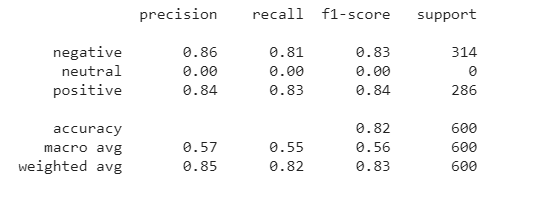

# 1. Install Java 8 and NLU

In [ ]:
import os
from sklearn.metrics import classification_report
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install  pyspark==2.4.7 
! pip install nlu > /dev/null    



import nlu

     |████████████████████████████████| 217.9MB 63kB/s 
     |████████████████████████████████| 204kB 19.5MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.7-py2.py3-none-any.whl size=218279465 sha256=3602214fb80c68afcb3d7c4ea233dcff49c3f269b66f32be9e3a461f9628b0e2
  Stored in directory: /root/.cache/pip/wheels/34/1f/2e/1e7460f80acf26b08dbb8c53d7ff9e07146f2a68dd5c732be5
Successfully built pyspark


# 2. Download Disaster  Sentiment dataset 
https://www.kaggle.com/vstepanenko/disaster-tweets
#Context

The file contains over 11,000 tweets associated with disaster keywords like “crash”, “quarantine”, and “bush fires” as well as the location and keyword itself. The data structure was inherited from Disasters on social media

The tweets were collected on Jan 14th, 2020.

Some of the topics people were tweeting:

The eruption of Taal Volcano in Batangas, Philippines
Coronavirus
Bushfires in Australia
Iran downing of the airplane flight PS752
Disclaimer: The dataset contains text that may be considered profane, vulgar, or offensive.

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/tweets.csv


--2021-02-25 08:39:36--  http://ckl-it.de/wp-content/uploads/2021/02/tweets.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1207952 (1.2M) [text/csv]
Saving to: ‘tweets.csv’

tweets.csv          100%[===================>]   1.15M  1.56MB/s    in 0.7s    

2021-02-25 08:39:37 (1.56 MB/s) - ‘tweets.csv’ saved [1207952/1207952]



In [ ]:
import pandas as pd
train_path = '/content/tweets.csv'

train_df = pd.read_csv(train_path,sep=",", encoding='latin-1')
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df.dropna()
positive = train_df[train_df['y']==("positive")].iloc[:1500]
negative = train_df[train_df['y']==("negative")].iloc[:1500]
positive = positive.append(negative, ignore_index = True)
positive = positive.sample(frac=1).reset_index(drop=True)
train_df = positive
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,Unnamed: 0,Ã¯Â»Â¿id,keyword,location,text,target,y
232,6602.0,10216.0,thunderstorm,atlÃ¢ÂÂ¢nolaÃ¢ÂÂ¢nsh,This thunderstorm is amazing rn Ã°ÂÂ¥Â´,1.0,positive
2209,56.0,4783.0,emergency,Bharat,This idiot ws CM of UP. He is asking doc on em...,0.0,negative
321,147.0,3775.0,derailment,"Chiraq,DriLLinois",Be not endowed in the flesh of your ego nor dr...,0.0,negative
141,2785.0,11154.0,wounded,"Islamabad, Pakistan",Snow and Avalunch Update (SDMA) 18 people incl...,1.0,positive
1130,2726.0,1056.0,blew%20up,uk | ÃÂ£Ã¡ÂµÂÃÂ³Ã¡ÂµÂ Ã¡ÂµÂÃ¡ÂµÂÃÂ·,um good morning this blew up what https://t.co...,0.0,negative
...,...,...,...,...,...,...,...
2630,718.0,4232.0,displaced,Global,January 12 marks the anniversary of the 2010 #...,1.0,positive
1833,2645.0,3905.0,destroy,metz | SarahÃ¢ÂÂ¡,But the story is this SheÃ¢ÂÂll destroy with...,0.0,negative
610,3400.0,10250.0,thunderstorm,"Greenwood, Mississippi",One of the hardest-hit areas of he severe thun...,1.0,positive
1181,1552.0,5080.0,evacuated,Btg,"Good News: Original Post: ""Residents had gone ...",0.0,negative


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
import nlu 
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlu.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
              precision    recall  f1-score   support

    negative       1.00      0.40      0.57        25
     neutral       0.00      0.00      0.00         0
    positive       0.94      0.64      0.76        25

    accuracy                           0.52        50
   macro avg       0.65      0.35      0.44        50
weighted avg       0.97      0.52      0.67        50



,target,Unnamed: 0,y,sentiment,keyword,sentiment_confidence,Ã¯Â»Â¿id,text,default_name_embeddings,location,document
origin_index,,,,,,,,,,,
0,0.0,1649.0,negative,negative,hail,0.620092,6069.0,Ladies &amp; Gentleman Pls Welcome The Full Me...,"[0.0718693882226944, -0.018772797659039497, -0...","Panama, IN",Ladies &amp; Gentleman Pls Welcome The Full Me...
1,0.0,999.0,negative,neutral,drowning,0.521189,4509.0,Emergency meeting for her millionaire grandson...,"[-0.06196709722280502, 0.03117111697793007, 0....",Burntisland,Emergency meeting for her millionaire grandson...
2,1.0,475.0,positive,neutral,rescued,0.557176,8573.0,Update from . Looks like they're getting rescu...,"[0.0428241565823555, -0.04131714627146721, -0....",Philippines,Update from . Looks like they're getting rescu...
3,0.0,2779.0,negative,neutral,evacuate,0.505861,5026.0,Bridal couple were little affected in contrast...,"[-0.040058307349681854, 0.006242941599339247, ...",JP,Bridal couple were little affected in contrast...
4,0.0,1517.0,negative,neutral,airplane%20accident,0.564590,163.0,How exactly does one accidentally fire a rocke...,"[-0.016879839822649956, 0.06649093329906464, -...",Iowa,How exactly does one accidentally fire a rocke...
5,0.0,1400.0,negative,neutral,famine,0.558466,5307.0,President Edgar Lungu told journalists his buy...,"[0.05988643690943718, -0.03577134758234024, -0...",Earth,President Edgar Lungu told journalists his buy...
6,0.0,215.0,negative,negative,apocalypse,0.666880,338.0,"Yea, but let's be honest. Kids value pretty mu...","[-0.029979687184095383, -0.016652535647153854,...",Sword Fight On The Heights,"Yea, but let's be honest. Kids value pretty mu..."
7,0.0,704.0,negative,neutral,danger,0.563472,3039.0,Can anyone believe the cheek of calling a bush...,"[-0.04716842249035835, -0.03333980590105057, -...",Canberra,Can anyone believe the cheek of calling a bush...
8,1.0,3149.0,positive,neutral,apocalypse,0.568612,323.0,no amount of sci-fi media couldÃ¢ÂÂve prepar...,"[-0.03867451846599579, 0.027363918721675873, -...",Madrid,no amount of sci-fi media couldÃ¢ÂÂve prepar...


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict("All the buildings in the capital were destroyed")

,sentiment,sentiment_confidence,default_name_embeddings,document
origin_index,,,,
0,neutral,0.592779,"[0.01043090783059597, 0.06007970869541168, -0....",All the buildings in the capital were destroyed


## 5. Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['sentiment_dl'] has settable params:
pipe['sentiment_dl'].setMaxEpochs(2)                 | Info: Maximum number of epochs to train | Currently set to : 2
pipe['sentiment_dl'].setLr(0.005)                    | Info: Learning Rate | Currently set to : 0.005
pipe['sentiment_dl'].setBatchSize(64)                | Info: Batch size | Currently set to : 64
pipe['sentiment_dl'].setDropout(0.5)                 | Info: Dropout coefficient | Currently set to : 0.5
pipe['sentiment_dl'].setEnableOutputLogs(True)       | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
pipe['sentiment_dl'].setThreshold(0.6)               | Info: The minimum threshold for the final result otheriwse it will be neutral | Currently set to : 0.6
pipe['sentiment_dl'].setThresholdLabel('neutral')    | Info: In case the score is less than threshold, what should be the label. Default i

## 6. Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe['sentiment_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.96      0.96      0.96        25
    positive       0.96      0.96      0.96        25

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



,target,Unnamed: 0,y,sentiment,keyword,sentiment_confidence,Ã¯Â»Â¿id,text,default_name_embeddings,location,document
origin_index,,,,,,,,,,,
0,0.0,1649.0,negative,negative,hail,0.969691,6069.0,Ladies &amp; Gentleman Pls Welcome The Full Me...,"[0.0718693882226944, -0.018772797659039497, -0...","Panama, IN",Ladies &amp; Gentleman Pls Welcome The Full Me...
1,0.0,999.0,negative,negative,drowning,0.882712,4509.0,Emergency meeting for her millionaire grandson...,"[-0.06196709722280502, 0.03117111697793007, 0....",Burntisland,Emergency meeting for her millionaire grandson...
2,1.0,475.0,positive,positive,rescued,0.799455,8573.0,Update from . Looks like they're getting rescu...,"[0.0428241565823555, -0.04131714627146721, -0....",Philippines,Update from . Looks like they're getting rescu...
3,0.0,2779.0,negative,negative,evacuate,0.926248,5026.0,Bridal couple were little affected in contrast...,"[-0.040058307349681854, 0.006242941599339247, ...",JP,Bridal couple were little affected in contrast...
4,0.0,1517.0,negative,negative,airplane%20accident,0.799277,163.0,How exactly does one accidentally fire a rocke...,"[-0.016879839822649956, 0.06649093329906464, -...",Iowa,How exactly does one accidentally fire a rocke...
5,0.0,1400.0,negative,negative,famine,0.776690,5307.0,President Edgar Lungu told journalists his buy...,"[0.05988643690943718, -0.03577134758234024, -0...",Earth,President Edgar Lungu told journalists his buy...
6,0.0,215.0,negative,negative,apocalypse,0.966522,338.0,"Yea, but let's be honest. Kids value pretty mu...","[-0.029979687184095383, -0.016652535647153854,...",Sword Fight On The Heights,"Yea, but let's be honest. Kids value pretty mu..."
7,0.0,704.0,negative,negative,danger,0.888085,3039.0,Can anyone believe the cheek of calling a bush...,"[-0.04716842249035835, -0.03333980590105057, -...",Canberra,Can anyone believe the cheek of calling a bush...
8,1.0,3149.0,positive,positive,apocalypse,0.796345,323.0,no amount of sci-fi media couldÃ¢ÂÂve prepar...,"[-0.03867451846599579, 0.027363918721675873, -...",Madrid,no amount of sci-fi media couldÃ¢ÂÂve prepar...


# 7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(120)  
trainable_pipe['sentiment_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.88      0.84      0.86      1186
     neutral       0.00      0.00      0.00         0
    positive       0.88      0.85      0.87      1214

    accuracy                           0.85      2400
   macro avg       0.59      0.56      0.58      2400
weighted avg       0.88      0.85      0.86      2400



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.86      0.81      0.83       314
     neutral       0.00      0.00      0.00         0
    positive       0.84      0.83      0.84       286

    accuracy                           0.82       600
   macro avg       0.57      0.55      0.56       600
weighted avg       0.85      0.82      0.83       600



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('All the buildings in the capital were destroyed')
preds

,sentiment,en_embed_sentence_small_bert_L12_768_embeddings,sentiment_confidence,document
origin_index,,,,
0,positive,"[-0.39346572756767273, 0.33815106749534607, -0...",0.994965,All the buildings in the capital were destroyed


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')            | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector'] has settable params:
pipe['sentence_detector'].setCustomBounds([])                  | Info: characters used to explicitly mark sentence bounds | Currently set to : []
pipe['sentence_detector'].setDetectLists(True)                 | Info: whether detect lists during sentence detection | Currently set to : True
pipe['sentence_detector'].setExplodeSentences(False)           | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector'].setMaxLength(99999)                  | Info: Set the maximum allowed length for ea